In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw03.ipynb")

# Homework 3: Table Manipulation and Visualization

**Reading**: 
* [Visualization](https://aup-cs2065.github.io/textbook/html/chapters/07/Visualization.html)

Please complete this notebook by filling in the cells provided. 

**Throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook!** For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Moreover, please be sure to only put your written answers in the provided cells. 

In [2]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *


# These lines do some fancy plotting magic.\n",
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')



## 1. Unemployment


The Federal Reserve Bank of St. Louis publishes data about jobs in the US.  Below, we've loaded data on unemployment in the United States. There are many ways of defining unemployment, and our dataset includes two notions of the unemployment rate:

1. Among people who are able to work and are looking for a full-time job, the percentage who can't find a job.  This is called the Non-Employment Index, or NEI.
2. Among people who are able to work and are looking for a full-time job, the percentage who can't find any job *or* are only working at a part-time job.  The latter group is called "Part-Time for Economic Reasons", so the acronym for this index is NEI-PTER.  (Economists are great at marketing.)

The source of the data is [here](https://fred.stlouisfed.org/categories/33509).

**Question 1.** The data are in a CSV file called `unemployment.csv`.  Load that file into a table called `unemployment`.

<!--
BEGIN QUESTION
name: q1_1
-->

In [ ]:
unemployment = ...
unemployment

In [ ]:
grader.check("q1_1")

**Question 2.** Sort the data in descending order by NEI, naming the sorted table `by_nei`.  Create another table called `by_nei_pter` that's sorted in descending order by NEI-PTER instead.

<!--
BEGIN QUESTION
name: q1_2
-->

In [ ]:
by_nei = ...
by_nei_pter = ...

In [ ]:
grader.check("q1_2")

**Question 3.** Use `take` to make a table containing the data for the 10 quarters when NEI was greatest.  Call that table `greatest_nei`.

`greatest_nei` should be sorted in descending order of `NEI`. Note that each row of `unemployment` represents a quarter.

<!--
BEGIN QUESTION
name: q1_3
-->

In [ ]:
greatest_nei = ...
greatest_nei

In [ ]:
greatest_nei.take(0).column(0).item(0) == '2009-10-01'

**Question 4.** It's believed that many people became PTER (recall: "Part-Time for Economic Reasons") in the "Great Recession" of 2008-2009.  NEI-PTER is the percentage of people who are unemployed (and counted in the NEI) plus the percentage of people who are PTER.  Compute an array containing the percentage of people who were PTER in each quarter.  (The first element of the array should correspond to the first row of `unemployment`, and so on.)

*Note:* Use the original `unemployment` table for this.

<!--
BEGIN QUESTION
name: q1_4
-->

In [ ]:
pter = ...
pter

In [ ]:
grader.check("q1_4")

**Question 5.** Add `pter` as a column to `unemployment` (named "PTER") and sort the resulting table by that column in descending order.  Call the table `by_pter`.

Try to do this with a single line of code, if you can.

<!--
BEGIN QUESTION
name: q1_5
-->

In [ ]:
by_pter = ...
by_pter

In [ ]:
grader.check("q1_5")

**Question 6.** 

Create a line plot of the PTER over time. 

To do this, create a new table called `pter_over_time` that adds the `year` array and the `pter` array to the `unemployment` table. Label these columns `Year` and `PTER`. Then, generate a line plot using one of the table methods you've learned in class.

<!--
BEGIN QUESTION
name: q1_6
-->

In [ ]:
year = 1994 + np.arange(by_pter.num_rows)/4
pter_over_time = ...
...

In [ ]:
grader.check("q1_6")

**Question 7.** Were PTER rates high during the Great Recession (that is to say, were PTER rates particularly high in the years 2008 through 2011)? Assign highPTER to `True` if you think PTER rates were high in this period, and `False` if you think they weren't. 

<!--
BEGIN QUESTION
name: q1_7
-->

In [ ]:
highPTER = ...

In [ ]:
grader.check("q1_7")

## 2. Birth Rates


The following table gives census-based population estimates for each state on both July 1, 2015 and July 1, 2016. The last four columns describe the components of the estimated change in population during this time interval. **For all questions below, assume that the word "states" refers to all 52 rows including Puerto Rico & the District of Columbia.**

The data was taken from [here](http://www2.census.gov/programs-surveys/popest/datasets/2010-2016/national/totals/nst-est2016-alldata.csv).

If you want to read more about the different column descriptions, click [here](http://www2.census.gov/programs-surveys/popest/datasets/2010-2015/national/totals/nst-est2015-alldata.pdf)!

The raw data is a bit messy - run the cell below to clean the table and make it easier to work with.

In [ ]:
# Don't change this cell; just run it.
pop = Table.read_table('nst-est2016-alldata.csv').where('SUMLEV', 40).select([1, 4, 12, 13, 27, 34, 62, 69])
pop = pop.relabeled('POPESTIMATE2015', '2015').relabeled('POPESTIMATE2016', '2016')
pop = pop.relabeled('BIRTHS2016', 'BIRTHS').relabeled('DEATHS2016', 'DEATHS')
pop = pop.relabeled('NETMIG2016', 'MIGRATION').relabeled('RESIDUAL2016', 'OTHER')
pop = pop.with_columns("REGION", np.array([int(region) if region != "X" else 0 for region in pop.column("REGION")]))
pop.set_format([2, 3, 4, 5, 6, 7], NumberFormatter(decimals=0)).show(5)

**Question 1.** Assign `us_birth_rate` to the total US annual birth rate during this time interval. The annual birth rate for a year-long period is the total number of births in that period as a proportion of the population size at the start of the time period.

**Hint:** Which year corresponds to the start of the time period?

<!--
BEGIN QUESTION
name: q2_1
-->

In [ ]:
us_birth_rate = ...
us_birth_rate

In [ ]:
grader.check("q2_1")

**Question 2.** Assign `movers` to the number of states for which the **absolute value** of the **annual rate of migration** was higher than 1%. The annual rate of migration for a year-long period is the net number of migrations (in and out) as a proportion of the population size at the start of the period. The `MIGRATION` column contains estimated annual net migration counts by state.

<!--
BEGIN QUESTION
name: q2_2
-->

In [ ]:
migration_rates = ...
movers = ...
movers

In [ ]:
grader.check("q2_2")

**Question 3.** Assign `west_births` to the total number of births that occurred in region 4 (the Western US). 

**Hint:** Make sure you double check the type of the values in the region column, and appropriately filter (i.e. the types must match!).

<!--
BEGIN QUESTION
name: q2_3
-->

In [ ]:
west_births = ...
west_births

In [ ]:
grader.check("q2_3")

**Question 4.** Assign `less_than_west_births` to the number of states that had a total population in 2016 that was smaller than the *total number of births in region 4 (the Western US)* during this time interval.

<!--
BEGIN QUESTION
name: q2_4
-->

In [ ]:
less_than_west_births = pop.where('2016', are.below(west_births)).num_rows
less_than_west_births

In [ ]:
grader.check("q2_4")

**Question 5.** 

In the next question, you will be creating a visualization to understand the relationship between birth and death rates. The annual death rate for a year-long period is the total number of deaths in that period as a proportion of the population size at the start of the time period.

What visualization is most appropriate to see if there is an association between birth and death rates during a given time interval?

1. Line Graph
<br>
2. Scatter Plot
<br>
3. Bar Chart

Assign `visualization` below to the number corresponding to the correct visualization.

<!--
BEGIN QUESTION
name: q2_5
-->

In [ ]:
visualization = ...

In [ ]:
grader.check("q2_5")

<!-- BEGIN QUESTION -->

**Question 6.** 

In the code cell below, create a visualization that will help us determine if there is an association between birth rate and death rate during this time interval. It may be helpful to create an intermediate table here.

<!--
BEGIN QUESTION
name: q2_6
manual: true
-->

In [ ]:
# Generate your chart in this cell
...

<!-- END QUESTION -->

**Question 7.** `True` or `False`: There is an association between birth rate and death rate during this time interval. 

Assign `assoc` to `True` or `False` in the cell below. 

<!--
BEGIN QUESTION
name: q2_7
-->

In [ ]:
assoc = ...

In [ ]:
grader.check("q2_7")

## 3. Marginal Histograms


Consider the following scatter plot: ![](scatter.png)

The axes of the plot represent values of two variables: $x$ and $y$. 

Suppose we have a table called `t` that has two columns in it:

- `x`: a column containing the x-values of the points in the scatter plot
- `y`: a column containing the y-values of the points in the scatter plot

Below, you are given two histograms, each of which corresponds to either column `x` or column `y`. 

**Histogram A:** ![](var1.png)
**Histogram B:** ![](var2.png)

**Question 1.** Suppose we run `t.hist('x')`. Which histogram does this code produce? Assign `histogram_column_x` to either 1 or 2.

1. Histogram A
2. Histogram B

<!--
BEGIN QUESTION
name: q3_1
manual: false
-->

In [ ]:
histogram_column_x = ...

In [ ]:
grader.check("q3_1")

<!-- BEGIN QUESTION -->

**Question 2.** State at least one reason why you chose the histogram from Question 1. Make sure to indicate which histogram you selected (ex: "I chose histogram A because ...").

<!--
BEGIN QUESTION
name: q3_2
manual: true
-->

_Type your answer here, replacing this text._

<!-- END QUESTION -->

**Question 3.** Suppose we run `t.hist('y')`. Which histogram does this code produce? `Assign histogram_column_y` to either 1 or 2.

1. Histogram A
2. Histogram B

<!--
BEGIN QUESTION
name: q3_3
manual: false
-->

In [ ]:
histogram_column_y = ...

In [ ]:
grader.check("q3_3")

<!-- BEGIN QUESTION -->

**Question 4.** State at least one reason why you chose the histogram from Question 3.  Make sure to indicate which histogram you selected (ex: "I chose histogram A because ...").

<!--
BEGIN QUESTION
name: q3_4
manual: true
-->

_Type your answer here, replacing this text._

<!-- END QUESTION -->



## 4. Uber


Below we load tables containing 200,000 weekday Uber rides in the Manila, Philippines, and Boston, Massachusetts metropolitan areas from the [Uber Movement](https://movement.uber.com) project. The `sourceid` and `dstid` columns contain codes corresponding to start and end locations of each ride. The `hod` column contains codes corresponding to the hour of the day the ride took place. The `ride time` column contains the length of the ride, in minutes.

In [3]:
boston = Table.read_table("boston.csv")
manila = Table.read_table("manila.csv")
print("Boston Table")
boston.show(4)
print("Manila Table")
manila.show(4)

Boston Table


sourceid,dstid,hod,ride time
584,33,7,11.866
1013,1116,13,17.7993
884,1190,22,19.3488
211,364,1,1.7235


Manila Table


sourceid,dstid,hod,ride time
544,5,22,22.8115
302,240,21,7.02267
278,99,16,21.6437
720,775,18,13.0597


<!-- BEGIN QUESTION -->

**Question 1.** Produce histograms of all ride times in Boston using the given bins. 

<!--
BEGIN QUESTION
name: q4_1
manual: true
-->


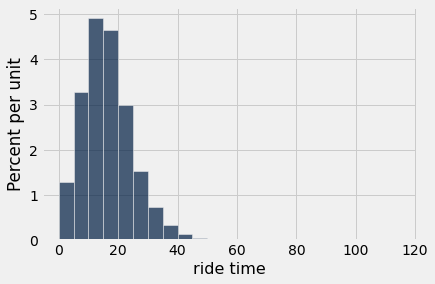

In [4]:
equal_bins = np.arange(0, 120, 5)
boston.hist("ride time", bins=equal_bins)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 2.** Now, produce histograms of all ride times in Manila using the given bins.

<!--
BEGIN QUESTION
name: q4_2
manual: true
-->

(0.0, 0.05)

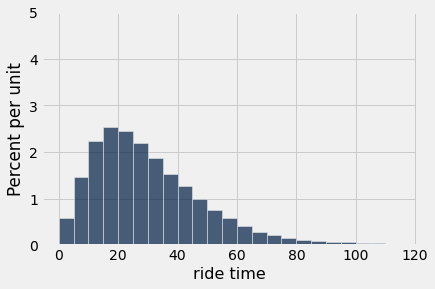

In [8]:
manila.hist("ride time", bins=equal_bins)

# Don't delete the following line!
plots.ylim(0, 0.05)

In [6]:
?plots.ylim

<!-- END QUESTION -->

**Question 3.** Assign `boston_under_10` and `manila_under_10` to the percentage of rides that are less than 10 minutes in their respective metropolitan areas. Use the height variables provided below in order to compute the percentages. Your solution should only use height variables, numbers, and mathematical operations. You should not access the tables boston and manila in any way.

<!--
BEGIN QUESTION
name: q4_3
manual: false
-->

In [ ]:
boston_under_5_height = 1.2
manila_under_5_height = 0.6
boston_5_to_under_10_height = 3.2
manila_5_to_under_10_height = 1.4

boston_under_10 = ...
manila_under_10 = ...

In [ ]:
grader.check("q4_3")

**Question 4.** Let's take a closer look at the distribution of ride times in Manila. Assign `manila_median_bin` to an integer (1, 2, 3, or 4) that corresponds to the bin that contains the median time 

1: 0-15 minutes  
2: 15-40 minutes  
3: 40-60 minutes  
4: 60-80 minutes  

*Hint:* The median of a sorted list has half of the list elements to its left, and half to its right

<!--
BEGIN QUESTION
name: q4_4
manual: false
-->

In [ ]:
manila_median_bin = ...
manila_median_bin

In [ ]:
grader.check("q4_4")

<!-- BEGIN QUESTION -->

**Question 5.** What is the main difference between the two histograms. What might be causing this?

**Hint:** Try thinking about external factors that may be causing the difference!

<!--
BEGIN QUESTION
name: q4_5
manual: true
-->

_Type your answer here, replacing this text._

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)